# **1. Keras Sequential Models**


The Sequential model API is great for developing deep learning models in most situations, but it also has some limitations.

For example, it is not straightforward to define models that may have multiple different input sources, produce multiple output destinations or models that re-use layers.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([Dense(2, input_dim=1), Dense(1)])

In [2]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(2, input_dim=1))
model.add(Dense(1))

# **2. Keras Functional Models**




*   define multiple input or output models as well as models that share layers
*   allows you to define ad hoc acyclic network graphs.
----
- Models are defined by creating instances of layers and connecting them directly to each other in pairs


In [3]:
#Defining Input

from keras.layers import Input
visible = Input(shape=(2,))

In [4]:
# Connecting Layers
# connected pairwise

from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)

In [5]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(2,))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)

# **3. Standard Network Models**

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 20)                220       
                                                                 
 dense_8 (Dense)             (None, 10)                210       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 551 (2.15 KB)
Trainable params: 551 (2.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


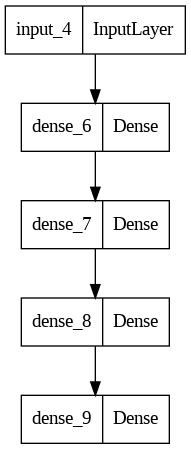

In [6]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 16)        8208      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2704)              0   

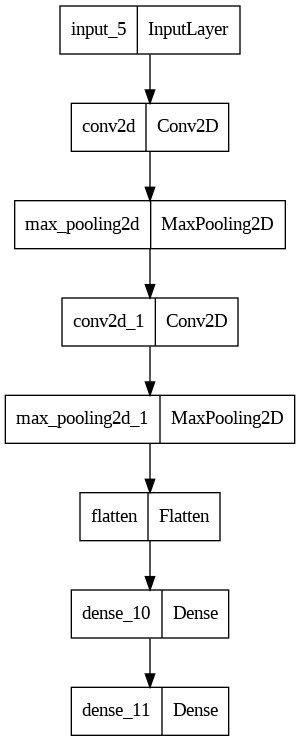

In [7]:
#Convolutional Layer

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D

visible = Input(shape=(64, 64, 1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

# Summarize layers
print(model.summary())

# Plot graph
plot_model(model, to_file='convolutional_neural_network.png')


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 601 (2.35 KB)
Trainable params: 601 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


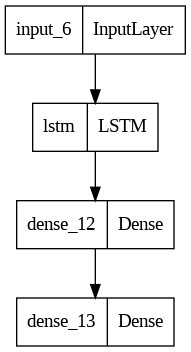

In [8]:
#RNN

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM

visible = Input(shape=(100, 1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())

# plot graph
plot_model(model, to_file='recurrent_neural_network.png')


# **4. Shared Layers Model**


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 61, 61, 32)           544       ['input_7[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 57, 57, 16)           1040      ['input_7[0][0]']             
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)           0         ['conv2d_2[0][0]']            
 g2D)                                                                                       

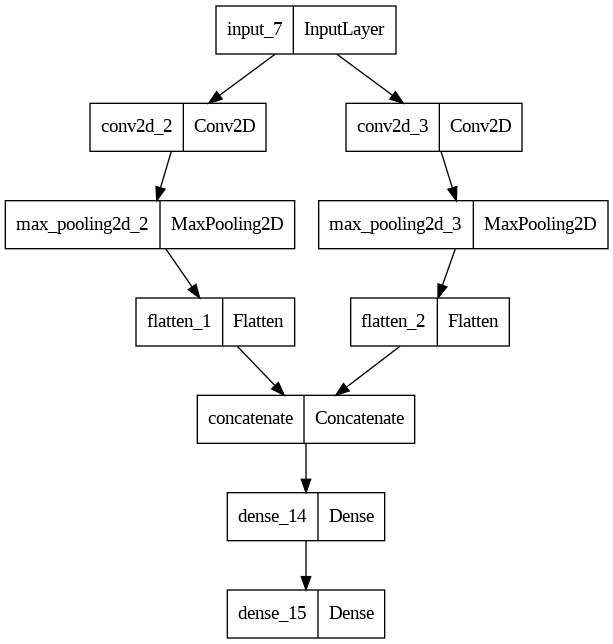

In [9]:
# Shared Input Layer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, concatenate

# input layer
visible = Input(shape=(64, 64, 1))
# first feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
# second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)
# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())

# plot graph
plot_model(model, to_file='shared_input_layer.png')


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 100, 1)]             0         []                            
                                                                                                  
 lstm_1 (LSTM)               (None, 10)                   480       ['input_8[0][0]']             
                                                                                                  
 dense_17 (Dense)            (None, 10)                   110       ['lstm_1[0][0]']              
                                                                                                  
 dense_18 (Dense)            (None, 20)                   220       ['dense_17[0][0]']            
                                                                                            

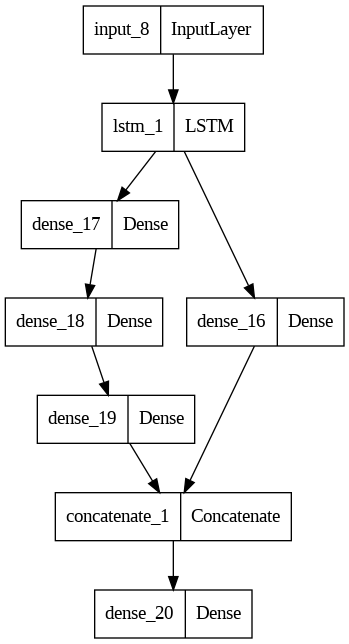

In [10]:
# Shared Feature Extraction Layer

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, concatenate

# define input
visible = Input(shape=(100, 1))
# feature extraction
extract1 = LSTM(10)(visible)
# first interpretation model
interp1 = Dense(10, activation='relu')(extract1)
# second interpretation model
interp11 = Dense(10, activation='relu')(extract1)
interp12 = Dense(20, activation='relu')(interp11)
interp13 = Dense(10, activation='relu')(interp12)
# merge interpretation
merge = concatenate([interp1, interp13])
# output
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=visible, outputs=output)

# summarize layers
print(model.summary())

# plot graph
plot_model(model, to_file='shared_feature_extractor.png')


# **5. Multiple Input and Output Models**


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 61, 61, 32)           544       ['input_9[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 29, 29, 32)           1568      ['input_10[0][0]']            
                                                                                            

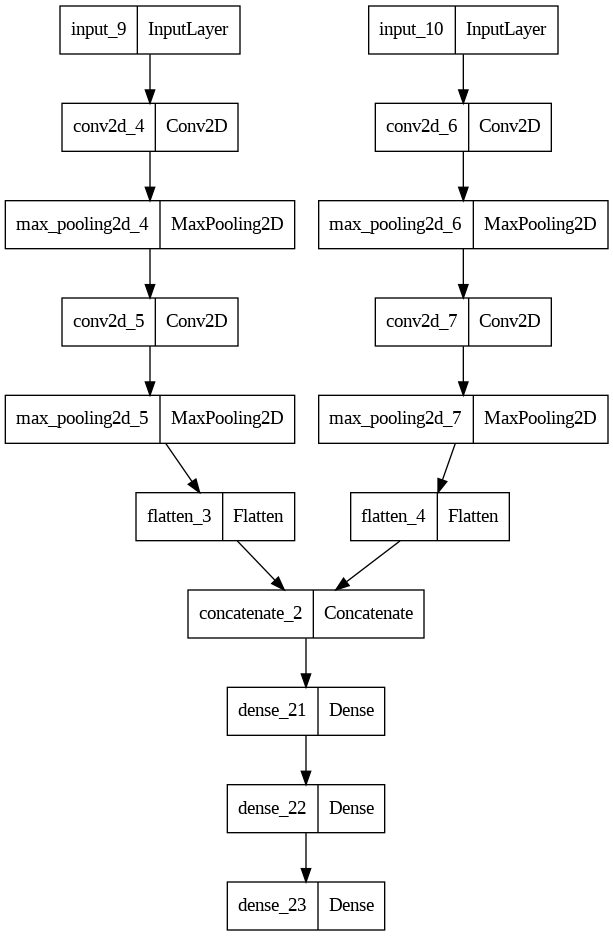

In [11]:
# Multiple Input Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, concatenate

# first input model
visible1 = Input(shape=(64, 64, 1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)

# second input model
visible2 = Input(shape=(32, 32, 3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)

# merge input models
merge = concatenate([flat1, flat2])

# interpretation model
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)

model = Model(inputs=[visible1, visible2], outputs=output)

# summarize layers
print(model.summary())

# plot graph
plot_model(model, to_file='multiple_inputs.png')


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 100, 1)]             0         []                            
                                                                                                  
 lstm_2 (LSTM)               (None, 100, 10)              480       ['input_11[0][0]']            
                                                                                                  
 lstm_3 (LSTM)               (None, 10)                   840       ['lstm_2[0][0]']              
                                                                                                  
 dense_24 (Dense)            (None, 10)                   110       ['lstm_3[0][0]']              
                                                                                            

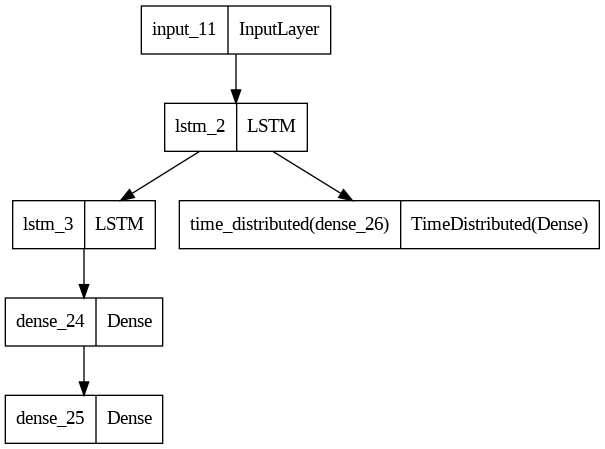

In [12]:
# Multiple Outputs

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, TimeDistributed

# input layer
visible = Input(shape=(100, 1))
# feature extraction
extract = LSTM(10, return_sequences=True)(visible)
# classification output
class11 = LSTM(10)(extract)
class12 = Dense(10, activation='relu')(class11)
output1 = Dense(1, activation='sigmoid')(class12)
# sequence output
output2 = TimeDistributed(Dense(1, activation='linear'))(extract)

# output
model = Model(inputs=visible, outputs=[output1, output2])

# summarize layers
print(model.summary())

# plot graph
plot_model(model, to_file='multiple_outputs.png')
